# **데이터 불러오기 및 메모리 축소**

In [1]:
#필요한 라이브러리 불러오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
import lightgbm as lgb

warnings.filterwarnings('ignore')
%matplotlib inline

pd.options.display.float_format = '{:,.3f}'.format
sns.set()

In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import gc

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#train 데이터 불러오기 

pubg_data = pd.read_csv("/content/drive/MyDrive/train_V2.csv")   #각자 구글 드라이브에 들어가면 바로 보이게 파일 넣으시고 경로 변경 없이 바로 데이터 불러올 수 있게 설정함 
df = pubg_data
df.info()

# 그냥 불러오면 983.9MB로 메모리가 굉장히 큰 상태 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [5]:
%%time
df.info()

# Memory usages in Bytes
print("Reduced Memory size: ",df.memory_usage(index=True).sum()/(1024*1024), "MB")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
for column_name in df:
    if df[column_name].dtype=='float64':
        df[column_name] = pd.to_numeric(df[column_name], downcast= 'float')
    if df[column_name].dtype=='int64':
        df[column_name] = pd.to_numeric(df[column_name],downcast='integer')

In [7]:
%%time
df.info()

# Memory usages in Bytes
print("Reduced Memory size: ",df.memory_usage(index=True).sum()/(1024*1024), "MB")

# 데이터의 메모리가 상당히 많이 줄었음을 알 수 있음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   

# **데이터 살펴보기 및 전처리**

In [8]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.000,0,0.000,0,0,244.800,1,1466,0.444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.004,0,11.040,0,0,"1,434.000",5,0,0.640
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.000,0,0.000,0,0,161.800,2,0,0.775
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.000,0,0.000,0,0,202.700,3,0,0.167
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.000,0,0.000,0,0,49.750,2,0,0.188


In [9]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [10]:
print("Train : ", df.shape)

Train :  (4446966, 29)


In [11]:

# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [12]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,"4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,966.000","4,446,965.000"
mean,0.234,1.107,130.717,0.658,0.227,1.370,47.599,505.006,0.925,0.544,22.998,"1,579.506",44.505,43.008,892.010,0.165,606.116,0.003,4.509,0.024,0.008,"1,154.218",3.660,606.460,0.473
std,0.589,1.716,170.781,1.146,0.602,2.680,27.463,627.505,1.558,0.711,50.973,258.740,23.828,23.289,736.648,0.472,"1,498.344",0.073,30.502,0.167,0.093,"1,183.497",2.457,739.700,0.307
min,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,9.000,1.000,1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,24.000,0.000,0.000,0.000,0.000,"1,367.000",28.000,27.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,155.100,2.000,0.000,0.200
50%,0.000,0.000,84.240,0.000,0.000,0.000,47.000,0.000,0.000,0.000,0.000,"1,438.000",30.000,30.000,"1,443.000",0.000,0.000,0.000,0.000,0.000,0.000,685.600,3.000,0.000,0.458
75%,0.000,2.000,186.000,1.000,0.000,2.000,71.000,"1,172.000",1.000,1.000,21.320,"1,851.000",49.000,47.000,"1,500.000",0.000,0.191,0.000,0.000,0.000,0.000,"1,976.000",5.000,"1,495.000",0.741
max,22.000,33.000,"6,616.000",53.000,64.000,80.000,101.000,"2,170.000",72.000,20.000,"1,094.000","2,237.000",100.000,100.000,"5,910.000",39.000,"40,710.000",18.000,"3,823.000",12.000,5.000,"25,780.000",236.000,"2,013.000",1.000


In [13]:
df.isnull().sum()  #결측치는 'winPlacePerc'(승률 변수)에서 존재   

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [14]:
df[df['winPlacePerc'].isna()==True]

# 전체 4446966 행에서 결측치 행 1행은 소수
# winPlacePerc 변수에서 결측치 값이 있는 1 행만 추출: 별 의미 없는 행
# ---> 최종적으로 이 행 제거 

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.000,0,0,0,1,0,0,0,0.000,9,solo-fpp,1,1,1574,0,0.000,0,0.000,0,0,0.000,0,0,NaN


In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum() # 모든 컬럼에 결측치가 없음을 확인 

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [17]:
# train.drop(['Id'], axis=1, inplace=True) # 'Id' 변수는 플레이어의 id(처음 게임 생성했을 때 지정하는 닉네임 변수)이기에 큰 영향을 주지 않을 것 같아서 drop ----> 추후 이상치 제거에 사용할 변수기에 주석 처리 

# **매치 타입 레이블 인코딩**

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
df['matchType'] = df['matchType'].apply(lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) else 'etc' if ('flare' in x) or ('crash' in x) else 'squad')
encoder = LabelEncoder()
df['matchType'] = encoder.fit_transform(df['matchType'])
df['matchType'].value_counts()


3    2400402
0    1315970
2     720712
1       9881
Name: matchType, dtype: int64

In [20]:
print(encoder.inverse_transform([0,1,2,3])) # duo는 0으로 etc는 1로 solo는 2로 squad는 3으로 레이블인코딩 됨 

['duo' 'etc' 'solo' 'squad']


In [21]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.000,1306,3,28,26,-1,0,0.000,0,0.000,0,0,244.800,1,1466,0.444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,0,0,0,0.000,1777,3,26,25,1484,0,0.004,0,11.040,0,0,"1,434.000",5,0,0.640
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.000,1318,0,50,47,1491,0,0.000,0,0.000,0,0,161.800,2,0,0.775
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,0,0,0,0.000,1436,3,31,30,1408,0,0.000,0,0.000,0,0,202.700,3,0,0.167
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.530,1424,2,97,95,1560,0,0.000,0,0.000,0,0,49.750,2,0,0.188


In [22]:
# maychtype이 etc인 애들은 승률에 무관하기 때문에 행에서 제거
df = df[df.matchType != 1]

In [23]:
# sum functions
def simple_shot(var):
    print('mean value of {} : {}'.format(var, df[var].mean()))
    print('median value of {} : {}'.format(var, df[var].median()))
    print('top 1% of {} : {}'.format(var, df[var].quantile(0.99)))
    print('max of {} : {}'.format(var, df[var].max()))
    print('min of {} : {}'.format(var, df[var].min()))

In [24]:
df_solo = df[df['matchType'] == 2]
df_solo.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.530,1424,2,97,95,1560,0,0.000,0,0.000,0,0,49.750,2,0,0.188
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.000,1967,2,96,92,-1,0,"2,004.000",0,0.000,0,0,"1,089.000",6,1500,0.737
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,986,4,1,49.830,1886,2,97,94,-1,0,"1,228.000",0,76.840,0,0,"2,050.000",6,1462,0.875
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,0,2,1,36.000,1371,2,96,95,1536,0,"2,367.000",0,15.290,0,0,"1,787.000",3,0,0.821
35,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,0,1,1,22.830,1425,2,96,94,1500,0,0.000,0,0.000,0,0,270.700,1,0,0.347


# **EDA(시각화)**

##  **6) weaponsAcquired**
(무기를 줍는 횟수)

In [25]:
temp = df_solo['weaponsAcquired'].value_counts().to_frame().reset_index()
temp.columns = ["weaponsAcquired","Count"]
temp

,weaponsAcquired,Count
0,2,120900
1,3,120363
2,4,107551
3,1,102262
4,5,84169
...,...,...
78,75,1
79,88,1
80,58,1
81,89,1


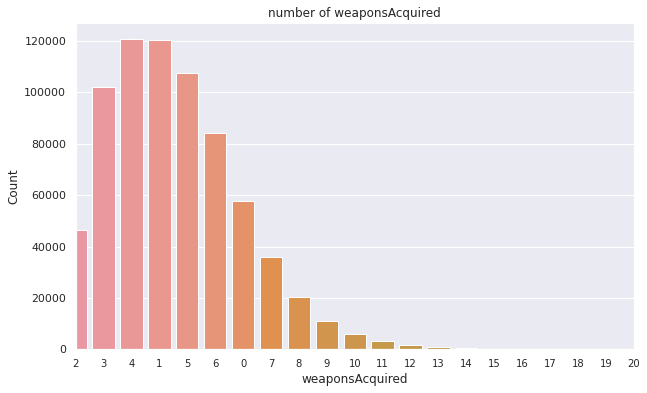

In [26]:
# plt.figure(figsize=(10,6))   # ★
# ticks = temp.weaponsAcquired.values
# ax = sns.barplot(x ="weaponsAcquired", y = "Count", data = temp)
# plt.ticklabel_format(axis ='y', useOffset = False, style = 'plain')
# ax.set_xticklabels(ticks, fontsize = 10)
# ax.set_title("number of weaponsAcquired")
# plt.xlim([0, 20]) 
# # plt.ylim([0, 10000])
# plt.show()

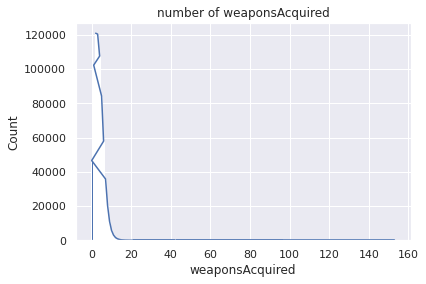

In [30]:
# plt.title('number of weaponsAcquired')
# # x축 라벨 설정
# plt.xlabel('weaponsAcquired')
# # x축 라벨 설정
# plt.ylabel('Count')
# # 선 그래프(x, y)
# plt.plot(temp['weaponsAcquired'], temp['Count'])
# # 막대 그래프(x, y)
# plt.bar(temp['weaponsAcquired'], temp['Count'])
# # 그래프 출력
# plt.show()


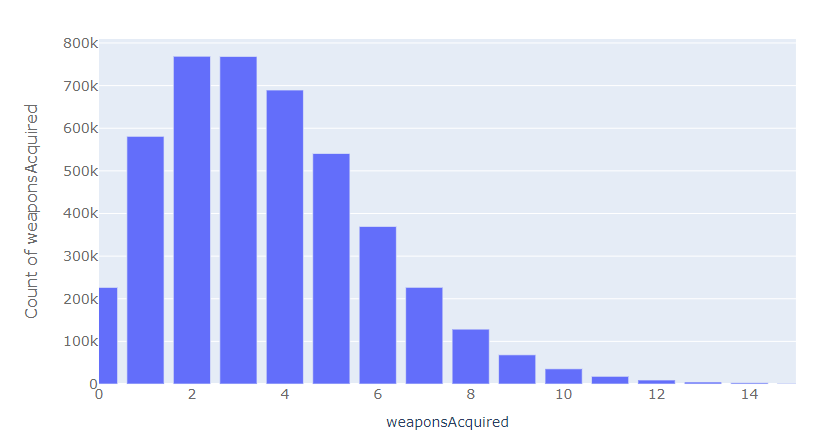


- 무기를 2~3번 정도 줍는 것이 가장 많음.  
- 배그 유저들은 대부분 본인들이 게임하기 편한 무기 2~3개 정도는 정해놓고 플레이 하기 때문에 게임 진행 도중에 총을 변경하는 경우는 거의 없음.  

## **7) HeadshotKills**  X
(머리를 관통해서 상대방이 즉시 사망한 경우-기절이나 데미지가 아닌 '즉시')

In [ ]:
temp = df_solo['headshotKills'].value_counts().to_frame().reset_index()
temp.columns = ["headshotKills","Count"]
temp

,headshotKills,Count
0,0,592241
1,1,95798
2,2,22136
3,3,6533
4,4,2274
5,5,924
6,6,336
7,7,183
8,8,112
9,9,55


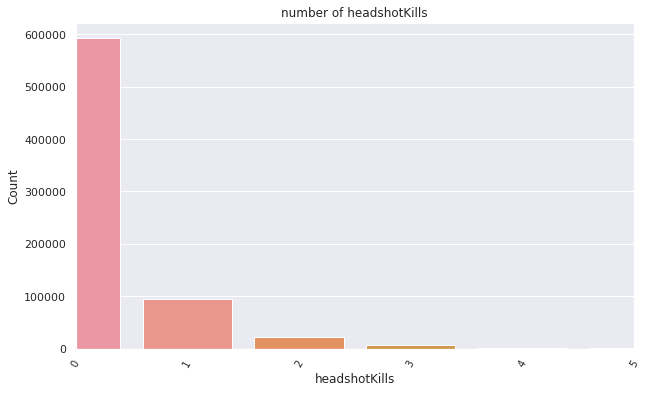

In [ ]:
plt.figure(figsize=(10,6))
ticks = temp.headshotKills.values
ax = sns.barplot(x ="headshotKills", y = "Count", data = temp)
plt.ticklabel_format(axis ='y', useOffset = False, style = 'plain')
ax.set_xticklabels(ticks, rotation = 60, fontsize = 10)
ax.set_title("number of headshotKills")
plt.xlim([0, 5]) 
# plt.ylim([0, 10000])
plt.show()

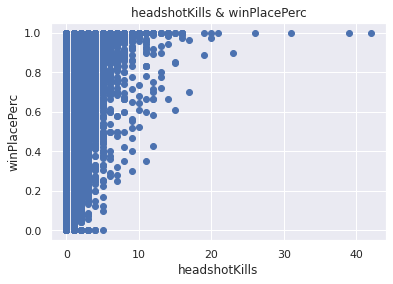

In [ ]:
# 가정: headshotKills 수가 많으면 실력이 좋은 것이기 때문에 승리할 확률이 높음 ---> 아님
plt.title('headshotKills & winPlacePerc')
# x축 라벨 설정
plt.xlabel('headshotKills')
# x축 라벨 설정
plt.ylabel('winPlacePerc')
plt.ticklabel_format(axis ='y', useOffset = False, style = 'plain')
plt.scatter(df_solo['headshotKills'], df_solo['winPlacePerc'])
plt.show()

- 대부분 헤드샷을 한 번도 하지 못하고 끝나는 경우가 많음.  
- 1번 정도가 그 다음으로 많음.  

 ---> 헤드샷은 대부분 상대방이 움직이지 않고 부동일 때 가능하기 때문에 계속 움직이면서 플레이 하는 배그 내에서 헤드샷을 많이 하기가 쉽진 않음.  

## **8) Boost vs heal**
(둘다 체력 회복, 전자는 빠르게 후자는 천천히)

In [ ]:
df_solo['totalDistance'] = df_solo['walkDistance'] + df_solo['rideDistance'] + df_solo['swimDistance']

In [ ]:
simple_shot('heals')

#평균적으로 1.3번 힐을 사용함
#99%사람들은 힐을 12번 사용함
#최대로 많이 사용한 힐 수는 80번 

mean value of heals : 1.3700732282733434
median value of heals : 0.0
top 1% of heals : 12.0
max of heals : 80
min of heals : 0


**heals**

In [ ]:
temp = df_solo['heals'].value_counts().to_frame().reset_index()
temp.columns = ["heals","Count"]
temp

,heals,Count
0,0,487117
1,1,96430
2,2,42567
3,3,26403
4,4,17860
5,5,16353
6,6,9928
7,7,6400
8,8,4103
9,9,2801


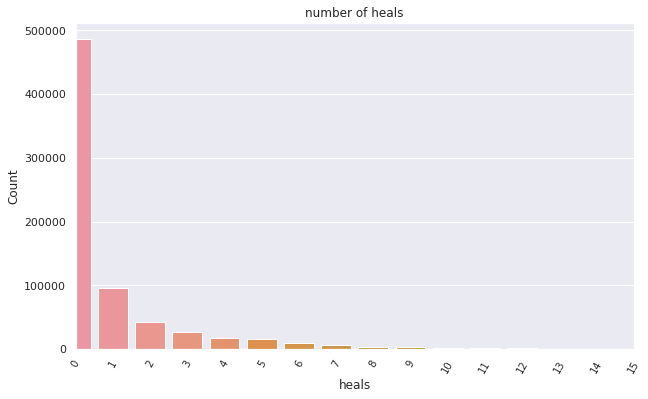

In [ ]:
plt.figure(figsize=(10,6))
ticks = temp.heals.values
ax = sns.barplot(x ="heals", y = "Count", data = temp)
plt.ticklabel_format(axis ='y', useOffset = False, style = 'plain')
ax.set_xticklabels(ticks, rotation = 60, fontsize = 10)
ax.set_title("number of heals")
plt.xlim([0, 15]) 
# plt.ylim([0, 10000])
plt.show()

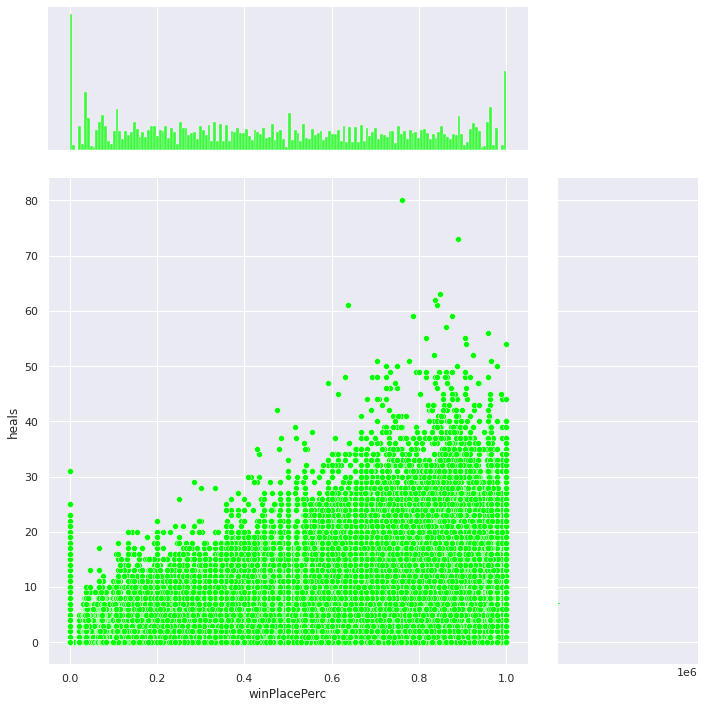

In [ ]:
sns.jointplot(x="winPlacePerc", y="heals", data=df, height=10, ratio=3, color="lime")
plt.show()

# ----> 승률과 힐 사용량은 양의 상관관계를 보이고 있음 

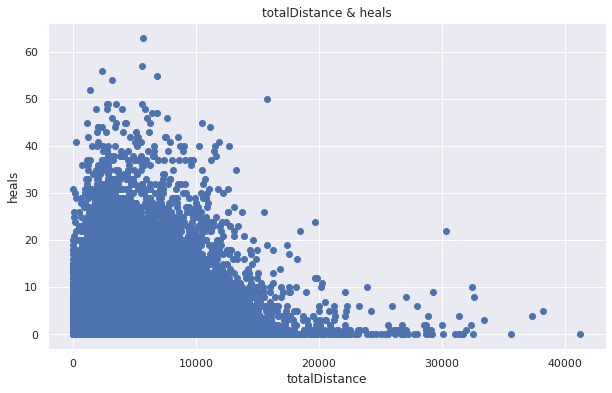

In [ ]:
# 가정: totalDistance가 0이면 heals의 수가 없어야 함.  ★  ----> 0인데 heals수가 있는 경우가 있음 
plt.figure(figsize=(10,6))
plt.title('totalDistance & heals')
# x축 라벨 설정
plt.xlabel('totalDistance')
# x축 라벨 설정
plt.ylabel('heals')
plt.ticklabel_format(axis ='y', useOffset = False, style = 'plain')
plt.scatter(df_solo['totalDistance'], df_solo['heals'])
plt.show()

**boosts**

In [ ]:
simple_shot('boosts')

#평균적으로 1.1번 부스트를 사용함
#99%사람들은 힐을 7번 사용함
#최대로 많이 사용한 힐 수는 33번 

mean value of boosts : 1.106694396590193
median value of boosts : 0.0
top 1% of boosts : 7.0
max of boosts : 33
min of boosts : 0


In [ ]:
temp = df_solo['boosts'].value_counts().to_frame().reset_index()
temp.columns = ["boosts","Count"]
temp

,boosts,Count
0,0,437991
1,1,97140
2,2,70696
3,3,40580
4,4,28178
5,5,18418
6,6,11982
7,7,7286
8,8,4117
9,9,2190


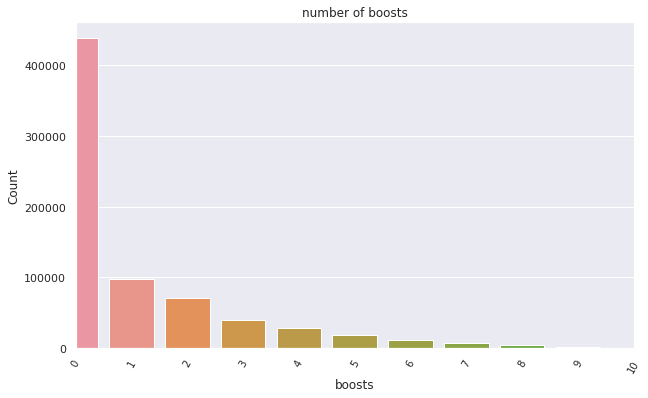

In [ ]:
plt.figure(figsize=(10,6))
ticks = temp.boosts.values
ax = sns.barplot(x ="boosts", y = "Count", data = temp)
plt.ticklabel_format(axis ='y', useOffset = False, style = 'plain')
ax.set_xticklabels(ticks, rotation = 60, fontsize = 10)
ax.set_title("number of boosts")
plt.xlim([0, 10]) 
# plt.ylim([0, 10000])
plt.show()

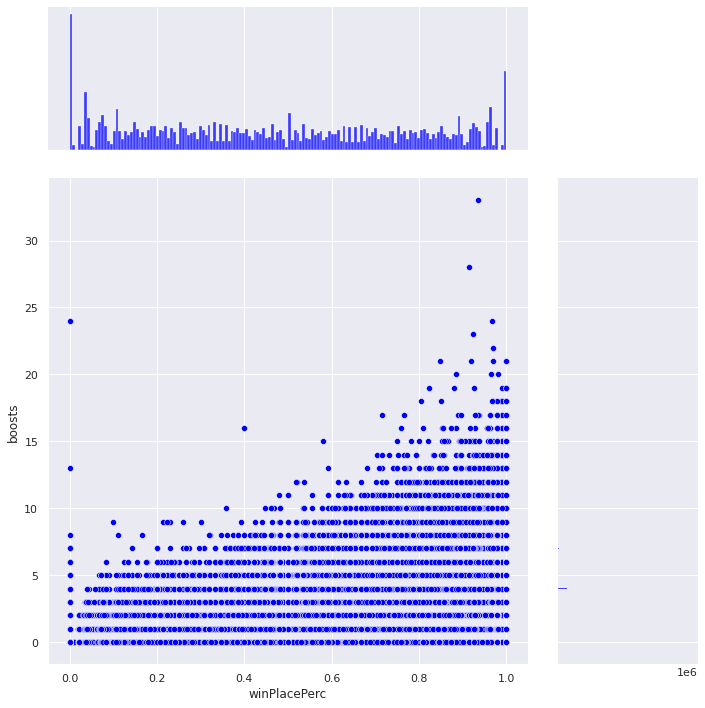

In [ ]:
sns.jointplot(x="winPlacePerc", y="boosts", data=df, height=10, ratio=3, color="blue")
plt.show()

- 부스트와 힐 둘 다, 먹지 않고 바로 죽지 않는 경우가 많다(0번이 제일 많음)---> 초반 킬 즉, 내리자 마자 바로 죽는 경우에 해당  
- 회복을 즉시 시켜주는 부스트와 천천히 회복시키는 힐은 비슷한 양상

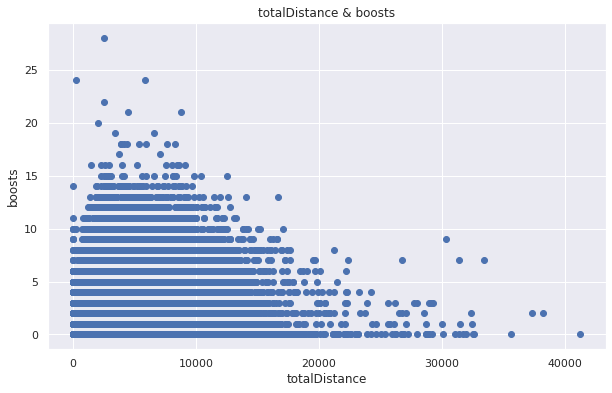

In [ ]:
# 가정: totalDistance가 0이면 boosts의 수가 없어야 함.  ★
plt.figure(figsize=(10,6))
plt.title('totalDistance & boosts')
# x축 라벨 설정
plt.xlabel('totalDistance')
# x축 라벨 설정
plt.ylabel('boosts')
plt.ticklabel_format(axis ='y', useOffset = False, style = 'plain')
plt.scatter(df_solo['totalDistance'], df_solo['boosts'])
plt.show()

In [ ]:
item = df_solo[['boosts', 'heals']]
item = item.sum(axis = 1).to_frame()  #부스트와 힐을 합쳐서 item 데이터프레임 생성성
item.columns = ['items']
display(item)

,items
4,0
7,0
13,6
17,15
35,0
...,...
4446950,0
4446954,0
4446959,0
4446962,1


In [ ]:
item_win = pd.concat([item, df_solo['winPlacePerc']],axis = 1)
item_win

,items,winPlacePerc
4,0,0.188
7,0,0.737
13,6,0.875
17,15,0.821
35,0,0.347
...,...,...
4446950,0,0.500
4446954,0,0.531
4446959,0,0.084
4446962,1,0.294


Text(0.5, 1.0, 'item_win')

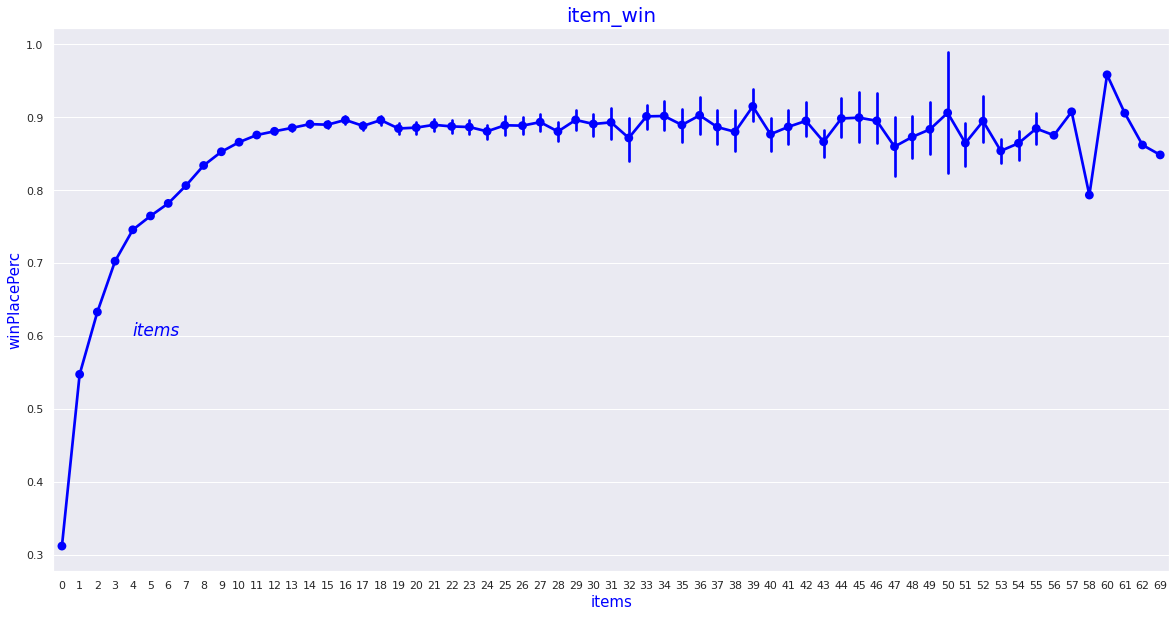

In [ ]:
f,ax1 = plt.subplots(figsize =(20,10))   # ★
sns.pointplot(x='items',y='winPlacePerc',data=item_win,color='blue',alpha=0.8)
plt.text(4,0.6,'items',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('items',fontsize = 15,color='blue')
plt.ylabel('winPlacePerc',fontsize = 15,color='blue')
plt.title('item_win',fontsize = 20,color='blue')



- 아이템 사용량과 승률은 양의 상관관계를 보임  
- 승률이 높다는 것은 매치 도중 죽지 않고 오래 살았다는 것----> 힐과 부스트를 자주 사용하면서 피가 깎일 때마다 다시 채워줬다는 의미 

## **9) DamageDealt**
(가한 총 피해량) 

<AxesSubplot:xlabel='damageDealt', ylabel='Density'>

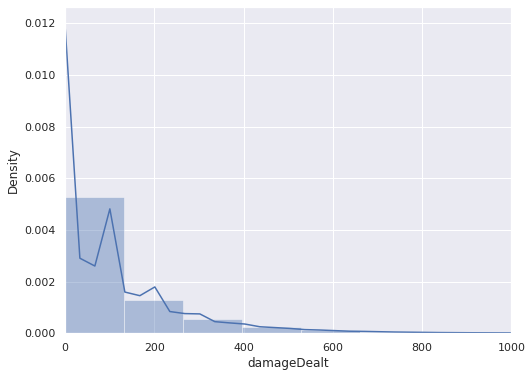

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
plt.xlim(0,1000)
sns.distplot(df_solo['damageDealt'])

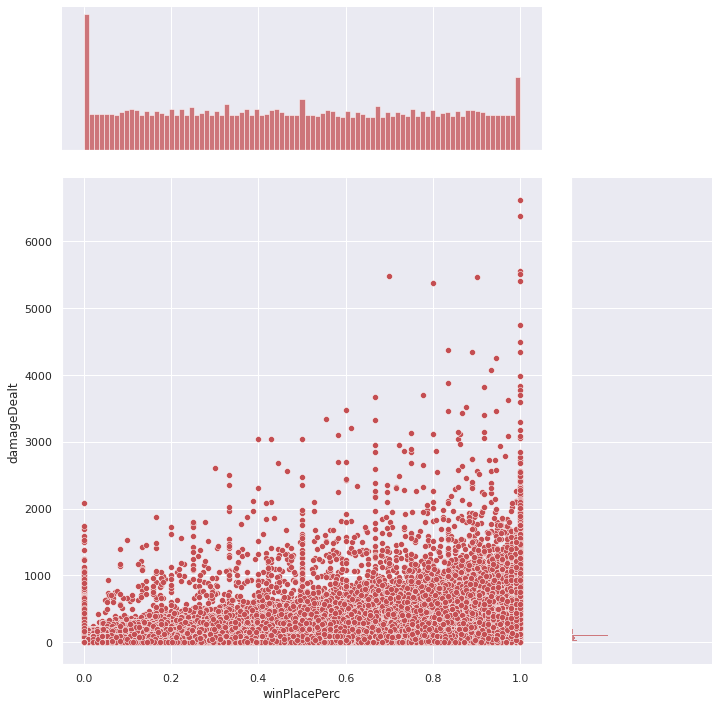

In [ ]:
sns.jointplot(x="winPlacePerc", y="damageDealt", data=df_solo, height=10, ratio=3, color="r")
plt.show()

- 승률과 가한 총 피해량은 양의 상관관계  
- 상위권 등수에 들어가기 위해서는 상대를 죽이면서 오래 살아남아야 하기 때문에 피해량이 많다=상대방을 많이 죽였다=오래 살아남았다=승률이 높아진다 

## **10) walk & ride & swim Distance**
(도보 & 차량 & 수영 이동거리)

**totalDistance**

In [ ]:
df_solo['totalDistance'] = df_solo['walkDistance'] + df_solo['rideDistance'] + df_solo['swimDistance']

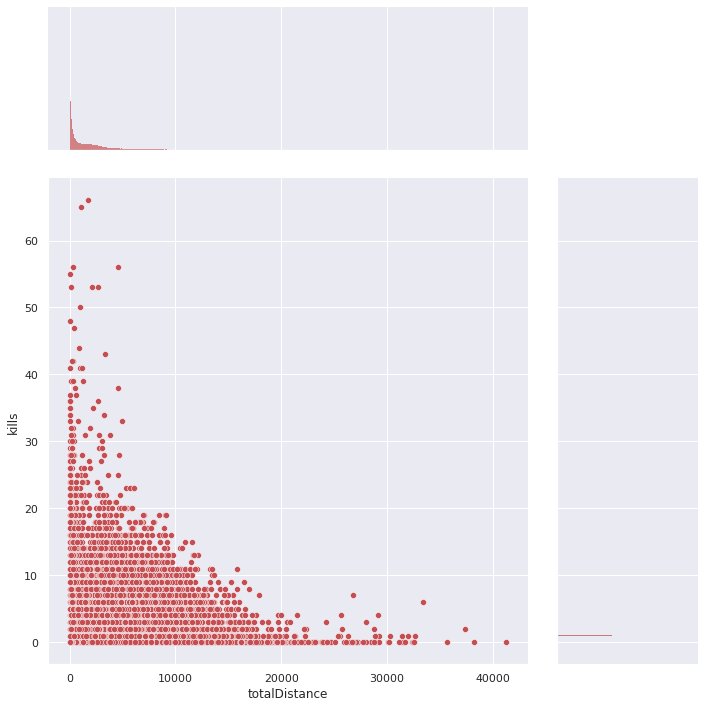

In [ ]:
# 가정: totalDistance가 크면 kills 수가 많을 것이라고 생각했지만 아님  ★
sns.jointplot(x="totalDistance", y="kills", data=df_solo, height=10, ratio=3, color="r")
plt.show()

**rideDistance**

In [ ]:
simple_shot('rideDistance')

#평균적으로 606m를 운전함
#99%의 사람들은 6961m 이하를 운전함
#제일 많이 운전한 사람은 40710m를 운전함 

mean value of rideDistance : 603.5543212890625
median value of rideDistance : 0.0
top 1% of rideDistance : 6961.1699999999255
max of rideDistance : 40710.0
min of rideDistance : 0.0


<AxesSubplot:xlabel='rideDistance', ylabel='Density'>

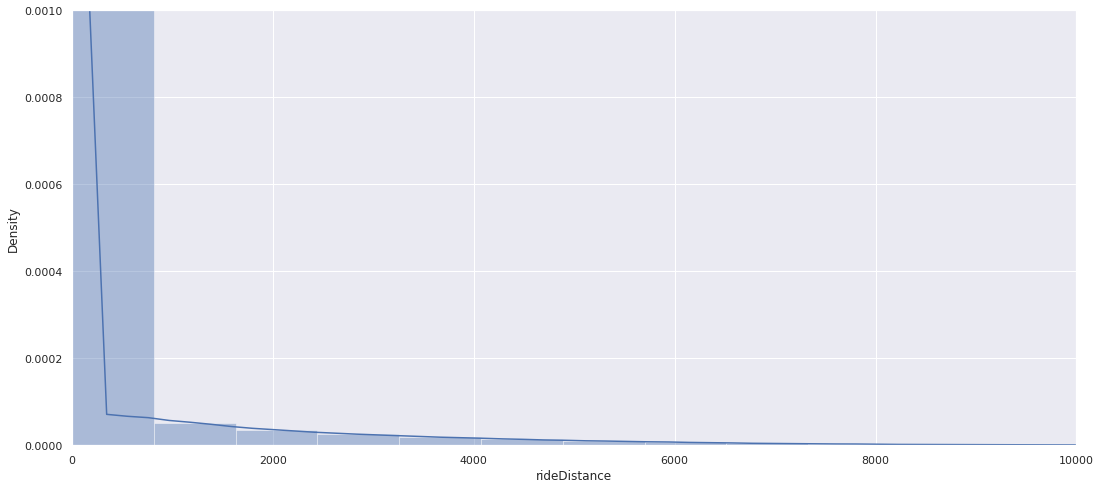

In [ ]:
#histogram
f, ax = plt.subplots(figsize=(18, 8))
plt.ylim(0, 0.001)
plt.xlim(0, 10000)
sns.distplot(df_solo['rideDistance'])


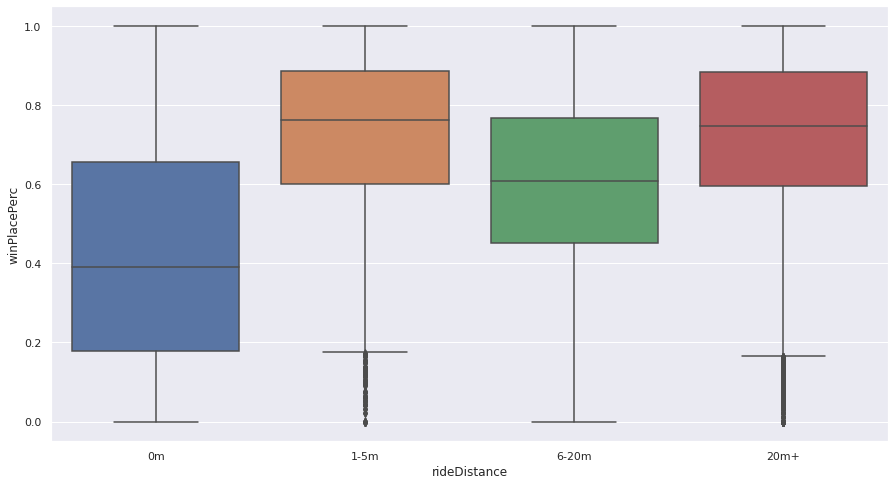

In [ ]:
ride = df_solo.copy()

ride['rideDistance'] = pd.cut(ride['rideDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="rideDistance", y="winPlacePerc", data=ride)
plt.show()

# 뚜렷한 상관관계는 없어보임 

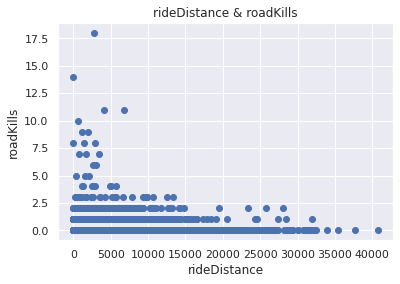

In [ ]:
# 가정: rideDistace가 크면 roadKills의 수도 많을 것이다. ---> 아님   ★ //rideDistance가 0인데 roadKills가 1이상이면 이상치
plt.title('rideDistance & roadKills')
# x축 라벨 설정
plt.xlabel('rideDistance')
# x축 라벨 설정
plt.ylabel('roadKills')
plt.ticklabel_format(axis ='y', useOffset = False, style = 'plain')
plt.scatter(df_solo['rideDistance'], df_solo['roadKills'])
plt.show()

In [ ]:
df_solo

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.530,1424,2,97,95,1560,0,0.000,0,0.000,0,0,49.750,2,0,0.188
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.000,1967,2,96,92,-1,0,"2,004.000",0,0.000,0,0,"1,089.000",6,1500,0.737
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,986,4,1,49.830,1886,2,97,94,-1,0,"1,228.000",0,76.840,0,0,"2,050.000",6,1462,0.875
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,0,2,1,36.000,1371,2,96,95,1536,0,"2,367.000",0,15.290,0,0,"1,787.000",3,0,0.821
35,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,0,1,1,22.830,1425,2,96,94,1500,0,0.000,0,0.000,0,0,270.700,1,0,0.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446950,d05b0c4b2ff311,8248fa2552457b,88c002b589d411,0,0,203.500,0,0,0,32,0,1,1,11.270,1897,2,95,92,1489,0,0.000,0,0.000,0,0,"1,559.000",5,0,0.500
4446954,894c01c8e4524f,c33e793af077f9,deb3a91c03d0f3,0,0,30.100,0,0,0,58,1007,0,0,0.000,1908,2,99,97,-1,0,0.000,0,0.000,0,0,"2,146.000",6,1502,0.531
4446959,d29bfa313ad766,ac3f1b4a56e5ad,2f3b1af94739b3,0,0,22.680,0,0,0,89,0,0,0,0.000,1456,2,96,95,1787,0,0.000,0,0.000,0,0,40.250,1,0,0.084
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150,0,0,0,69,0,0,0,0.000,1435,2,93,93,1501,0,0.000,0,0.000,0,0,81.700,6,0,0.294


**swimDistance**

In [ ]:
simple_shot('swimDistance')

#평균 수영거리는 4.5m
#99%의 사람들은 123m 이하를 수영
#가장 많이 수영한 거리는 3823m

mean value of swimDistance : 4.512839317321777
median value of swimDistance : 0.0
top 1% of swimDistance : 123.0
max of swimDistance : 3823.0
min of swimDistance : 0.0


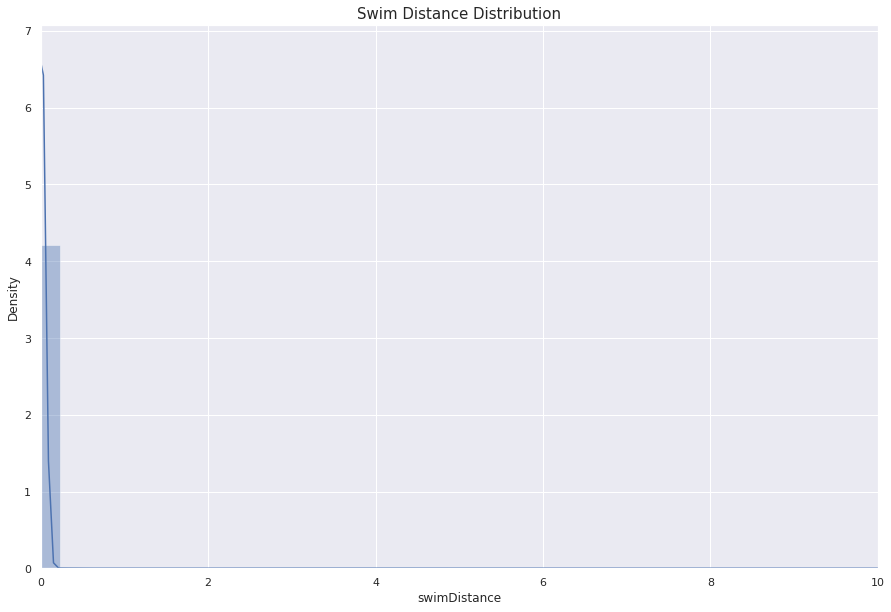

In [ ]:
data = df_solo.copy()
data = data[data['swimDistance'] < df_solo['swimDistance'].quantile(0.95)]
plt.figure(figsize=(15,10))
plt.title("Swim Distance Distribution",fontsize=15)
sns.distplot(data['swimDistance'])
plt.xlim(0,10)
plt.show()

# 대부분 수영을 하지 않음 

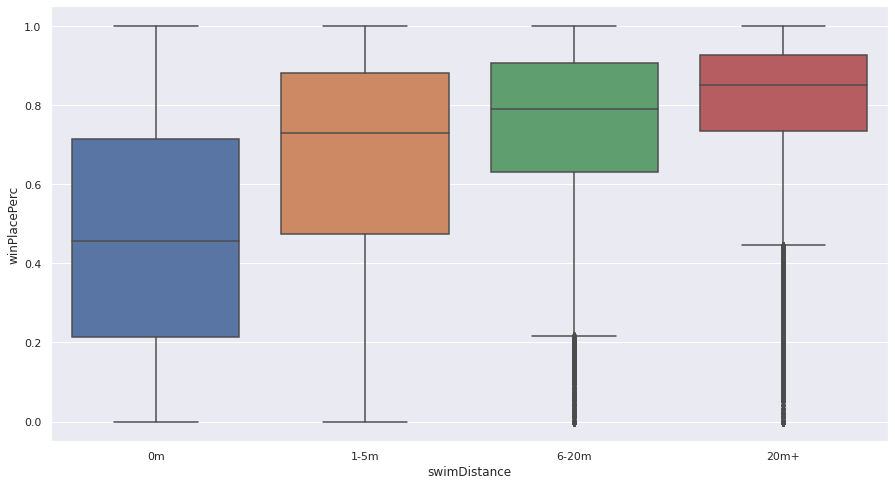

In [ ]:
swim = df_solo.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

# 수영을 많이 하면 승리할 확률이 높아지긴 함.  ★

In [ ]:
distance = df_solo[['rideDistance', 'swimDistance', 'walkDistance','winPlacePerc']]
corr_rank = distance.corr()["winPlacePerc"].sort_values(ascending=False)
print(corr_rank)

winPlacePerc   1.000
walkDistance   0.811
rideDistance   0.318
swimDistance   0.165
Name: winPlacePerc, dtype: float64


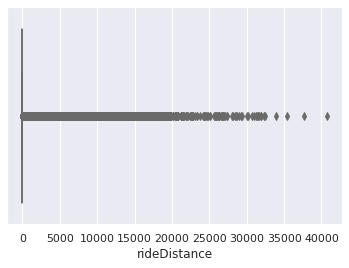

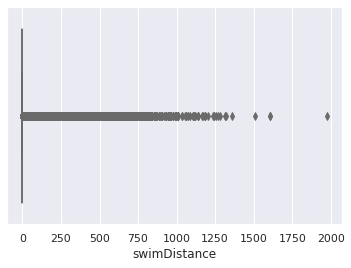

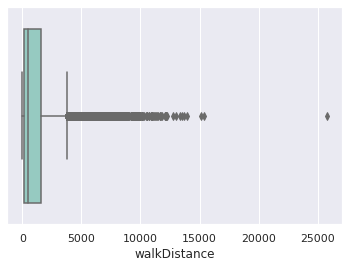

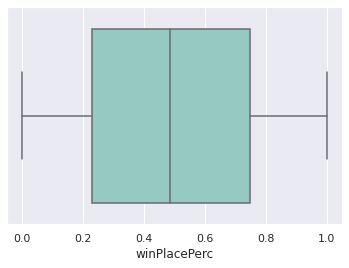

In [ ]:
for i in distance:
  sns.boxplot(x = i,  data = df_solo,palette = "Set3")
  plt.show()

rideDistance >40000 확인 후 제거 결정

In [ ]:
df_solo[df_solo['rideDistance']>40000][['rideDistance']] #1행 있음

,rideDistance
4099938,"40,710.000"


siwmDistance>4000 확인 후 제거 결정

In [ ]:
df_solo[df_solo['swimDistance']>1750][['swimDistance']]  #1행 있음 

,swimDistance
845213,"1,974.000"


walkDistance >25000 확인 후 제거 결정

In [ ]:
df_solo[df_solo['walkDistance']>25000][['walkDistance']] # 1행 있음 

,walkDistance
497965,"25,780.000"


## **11) VehicleDestroys**
(파괴된 차량의 수)

In [ ]:
temp = df_solo['vehicleDestroys'].value_counts().to_frame().reset_index()
temp.columns = ["vehicleDestroys","Count"]
temp

,vehicleDestroys,Count
0,0,717573
1,1,3041
2,2,88
3,3,8
4,4,1
5,5,1


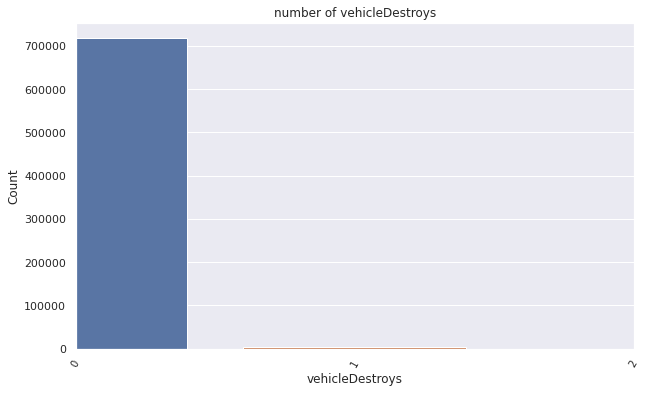

In [ ]:
plt.figure(figsize=(10,6))
ticks = temp.vehicleDestroys.values
ax = sns.barplot(x ="vehicleDestroys", y = "Count", data = temp)
plt.ticklabel_format(axis ='y', useOffset = False, style = 'plain')
ax.set_xticklabels(ticks, rotation = 60, fontsize = 10)
ax.set_title("number of vehicleDestroys")
plt.xlim([0, 2]) 
# plt.ylim([0, 10000])
plt.show()

거의 대부분 차를 부시지 않음. 총알 낭비+소리 때문에 위치 들킴>이득이 없는 행위   
차를 부시는 이유는   

1) 상대방이 차에 타고 있을 경우  
2) 상대방이 차 뒤에 숨어있을 경우  
3) 그냥 재미로   

**총정리**

1) 거리 관련한 변수들 중에서 이상치 의심되는 행이 2개 정도인데 같이 확인 후 제거 여부 결정  
2) 거리 제외하고는 배그 매치에서 충분히 이상치 값들(평균을 벗어나서 높은 값)이 나올 수 있기 때문에 이러한 변수의 값들(행)은 제거하지 않는 것이 좋아보임   